Correlation analysis between the Ethereum currency and Reddit

In [1]:
import pandas as pd
import numpy as np
# misc
import datetime as dt
from pprint import pprint
from itertools import chain
import redditcleaner
import re

# sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer # tokenize words
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
import spacy
import eng_spacysentiment

nlp_eng = eng_spacysentiment.load()
porter = PorterStemmer()
nlp = spacy.load("en_core_web_sm")
# visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8) # default plot size
import seaborn as sns
sns.set(style='whitegrid', palette='Dark2')
from wordcloud import WordCloud
nltk.download('vader_lexicon') # get lexicons data
nltk.download('punkt') # for tokenizer
nltk.download('stopwords')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rameshbabum\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rameshbabum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rameshbabum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
Ethereum_data_Spacy = pd.read_csv("final_cleaned.csv")
Market_data = pd.read_csv("ethereum_market_data_month_latest.csv")

In [3]:
Ethereum_data_Spacy['cleaned_discription'] = Ethereum_data_Spacy['cleaned_discription'].astype(str)

In [4]:
def getResult(text):
    doc = nlp_eng(text)
    return doc.cats  

In [5]:
Ethereum_data_Spacy['final_polarity'] = Ethereum_data_Spacy['cleaned_discription'].apply(getResult)

In [6]:
Ethereum_data_Spacy['final_polarity'][2]

{'positive': 0.005290520377457142, 'negative': 0.9947094917297363}

In [7]:
res = [*Ethereum_data_Spacy['cleaned_discription'].apply(getResult)]

In [8]:
res[1]

{'positive': 0.6971307396888733, 'negative': 0.30286920070648193}

In [9]:
sentiment_df = pd.DataFrame.from_records(res)
Ethereum_data_Spacy = pd.concat([Ethereum_data_Spacy, sentiment_df], axis=1, join='inner')
Ethereum_data_Spacy.head()

,Unnamed: 0,created_utc,title,selftext,Date,cleaned_discription,final_polarity,positive,negative
0,0,1.637880e+09,Ethereum Facebook Group acquired - How is that...,I'm a member of the largest public Ethereum gr...,2021-11-25,member largest public ethereum group facebook ...,"{'positive': 0.9999998807907104, 'negative': 1...",1.000000,1.221963e-07
1,1,1.637880e+09,CRO erc20 is safe?,Hello i have some CRO on an hardware wallet bu...,2021-11-25,hello cro hardwar wallet erc20 cro ethereum to...,"{'positive': 0.6971307396888733, 'negative': 0...",0.697131,3.028692e-01
2,2,1.637878e+09,Write off question!,Hi everyone I'm a sole proprietor in Hawaii US...,2021-11-25,hi everyon sole proprietor hawaii usa year une...,"{'positive': 0.005290520377457142, 'negative':...",0.005291,9.947095e-01
3,3,1.637878e+09,MOONX | Low Cap |3m MC | Utility coin for Mark...,MOONX MoonX is a Utility Token that will revi...,2021-11-25,moonx moonx util token revitalis bsc space bri...,"{'positive': 0.9991944432258606, 'negative': 0...",0.999194,8.055200e-04
4,4,1.637878e+09,Macy’s launching Polygon powered commemorative...,Macy’s dropped their first ever NFT collection...,2021-11-25,maci drop first ever nft collect consist 10 un...,"{'positive': 0.0981893390417099, 'negative': 0...",0.098189,9.018106e-01


In [10]:
def getAnalysisSpacy(score):
    if score < 0.5:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [11]:
Ethereum_data_Spacy['Analysis_Spacy'] = Ethereum_data_Spacy['positive'].apply(getAnalysisSpacy)

In [12]:
Ethereum_data_Spacy.Analysis_Spacy.value_counts()

Positive    19248
Negative     6387
Name: Analysis_Spacy, dtype: int64

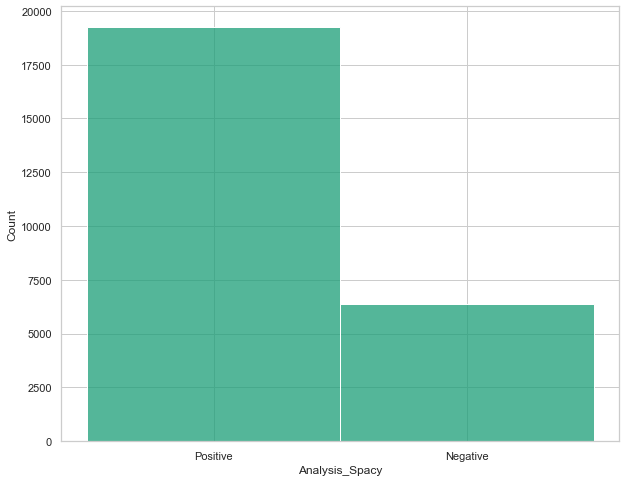

In [13]:
sns.histplot(Ethereum_data_Spacy.Analysis_Spacy);

In [14]:
#greater than the start date and smaller than the end date 11/25/2021 09/02/2021
start_date ='2021-09-02'
end_date='2021-11-25'
mask = (Ethereum_data_Spacy['Date'] >= start_date) & (Ethereum_data_Spacy['Date'] <= end_date)

In [15]:
df = Ethereum_data_Spacy.loc[mask]

In [16]:
df.reset_index()

,index,Unnamed: 0,created_utc,title,selftext,Date,cleaned_discription,final_polarity,positive,negative,Analysis_Spacy
0,0,0,1.637880e+09,Ethereum Facebook Group acquired - How is that...,I'm a member of the largest public Ethereum gr...,2021-11-25,member largest public ethereum group facebook ...,"{'positive': 0.9999998807907104, 'negative': 1...",1.000000,1.221963e-07,Positive
1,1,1,1.637880e+09,CRO erc20 is safe?,Hello i have some CRO on an hardware wallet bu...,2021-11-25,hello cro hardwar wallet erc20 cro ethereum to...,"{'positive': 0.6971307396888733, 'negative': 0...",0.697131,3.028692e-01,Positive
2,2,2,1.637878e+09,Write off question!,Hi everyone I'm a sole proprietor in Hawaii US...,2021-11-25,hi everyon sole proprietor hawaii usa year une...,"{'positive': 0.005290520377457142, 'negative':...",0.005291,9.947095e-01,Negative
3,3,3,1.637878e+09,MOONX | Low Cap |3m MC | Utility coin for Mark...,MOONX MoonX is a Utility Token that will revi...,2021-11-25,moonx moonx util token revitalis bsc space bri...,"{'positive': 0.9991944432258606, 'negative': 0...",0.999194,8.055200e-04,Positive
4,4,4,1.637878e+09,Macy’s launching Polygon powered commemorative...,Macy’s dropped their first ever NFT collection...,2021-11-25,maci drop first ever nft collect consist 10 un...,"{'positive': 0.0981893390417099, 'negative': 0...",0.098189,9.018106e-01,Negative
...,...,...,...,...,...,...,...,...,...,...,...
9937,9937,10758,1.630544e+09,Technical Test Reference,The development of SP4C3's first test network ...,2021-09-02,develop sp4c3 first test network progress aita...,"{'positive': 0.9433544874191284, 'negative': 0...",0.943354,5.664548e-02,Positive
9938,9938,10759,1.630543e+09,Hey 👋 I’m here to tell you about Boost Coin ⚡️...,Boost Coin is the native cryptocurrency of the...,2021-09-02,boost coin nativ cryptocurr boost ecosystem ad...,"{'positive': 0.9993914365768433, 'negative': 0...",0.999391,6.085308e-04,Positive
9939,9939,10761,1.630543e+09,Coinbase’s Bitcoin (BTC) Outflow Highest Since...,Bitcoin has started off the new month of Septe...,2021-09-02,bitcoin start new month septemb new low seen w...,"{'positive': 0.979988694190979, 'negative': 0....",0.979989,2.001131e-02,Positive
9940,9940,10762,1.630542e+09,www.cyberpatch.news,Hey everyone wanted to shameless plug the Cybe...,2021-09-02,hey everyon want shameless plug cybersecur new...,"{'positive': 0.01958831585943699, 'negative': ...",0.019588,9.804116e-01,Negative


In [17]:
from datetime import datetime
def convertdate(ts):
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

In [18]:
df['Date'] = df['created_utc'].apply(convertdate)

<ipython-input-18-47183eb34072>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['created_utc'].apply(convertdate)


In [19]:
df

,Unnamed: 0,created_utc,title,selftext,Date,cleaned_discription,final_polarity,positive,negative,Analysis_Spacy
0,0,1.637880e+09,Ethereum Facebook Group acquired - How is that...,I'm a member of the largest public Ethereum gr...,2021-11-25 22:46:41,member largest public ethereum group facebook ...,"{'positive': 0.9999998807907104, 'negative': 1...",1.000000,1.221963e-07,Positive
1,1,1.637880e+09,CRO erc20 is safe?,Hello i have some CRO on an hardware wallet bu...,2021-11-25 22:33:18,hello cro hardwar wallet erc20 cro ethereum to...,"{'positive': 0.6971307396888733, 'negative': 0...",0.697131,3.028692e-01,Positive
2,2,1.637878e+09,Write off question!,Hi everyone I'm a sole proprietor in Hawaii US...,2021-11-25 22:13:09,hi everyon sole proprietor hawaii usa year une...,"{'positive': 0.005290520377457142, 'negative':...",0.005291,9.947095e-01,Negative
3,3,1.637878e+09,MOONX | Low Cap |3m MC | Utility coin for Mark...,MOONX MoonX is a Utility Token that will revi...,2021-11-25 22:07:58,moonx moonx util token revitalis bsc space bri...,"{'positive': 0.9991944432258606, 'negative': 0...",0.999194,8.055200e-04,Positive
4,4,1.637878e+09,Macy’s launching Polygon powered commemorative...,Macy’s dropped their first ever NFT collection...,2021-11-25 21:58:39,maci drop first ever nft collect consist 10 un...,"{'positive': 0.0981893390417099, 'negative': 0...",0.098189,9.018106e-01,Negative
...,...,...,...,...,...,...,...,...,...,...
9937,10758,1.630544e+09,Technical Test Reference,The development of SP4C3's first test network ...,2021-09-02 01:01:07,develop sp4c3 first test network progress aita...,"{'positive': 0.9433544874191284, 'negative': 0...",0.943354,5.664548e-02,Positive
9938,10759,1.630543e+09,Hey 👋 I’m here to tell you about Boost Coin ⚡️...,Boost Coin is the native cryptocurrency of the...,2021-09-02 00:44:04,boost coin nativ cryptocurr boost ecosystem ad...,"{'positive': 0.9993914365768433, 'negative': 0...",0.999391,6.085308e-04,Positive
9939,10761,1.630543e+09,Coinbase’s Bitcoin (BTC) Outflow Highest Since...,Bitcoin has started off the new month of Septe...,2021-09-02 00:34:14,bitcoin start new month septemb new low seen w...,"{'positive': 0.979988694190979, 'negative': 0....",0.979989,2.001131e-02,Positive
9940,10762,1.630542e+09,www.cyberpatch.news,Hey everyone wanted to shameless plug the Cybe...,2021-09-02 00:22:13,hey everyon want shameless plug cybersecur new...,"{'positive': 0.01958831585943699, 'negative': ...",0.019588,9.804116e-01,Negative


In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']

df_grouped = df.groupby(pd.Grouper(freq='1d'))['positive'].sum()

<ipython-input-20-e9dec6f124da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [21]:
Market_data['Date'] = pd.to_datetime(Market_data['Date'])
Market_data.index = Market_data['Date']

crypto_usd_grouped = Market_data.groupby(pd.Grouper(freq='1d'))['close'].mean()

In [22]:
# crypto_usd_grouped.drop(crypto_usd_grouped.tail(4).index, inplace=True)

In [23]:
len(crypto_usd_grouped)

85

In [24]:
len(df_grouped)

85

In [25]:
import scipy as sp
sp.corrcoef(df_grouped,crypto_usd_grouped)

<ipython-input-25-949cae44f593>:2: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  sp.corrcoef(df_grouped,crypto_usd_grouped)


array([[1.        , 0.67035071],
       [0.67035071, 1.        ]])

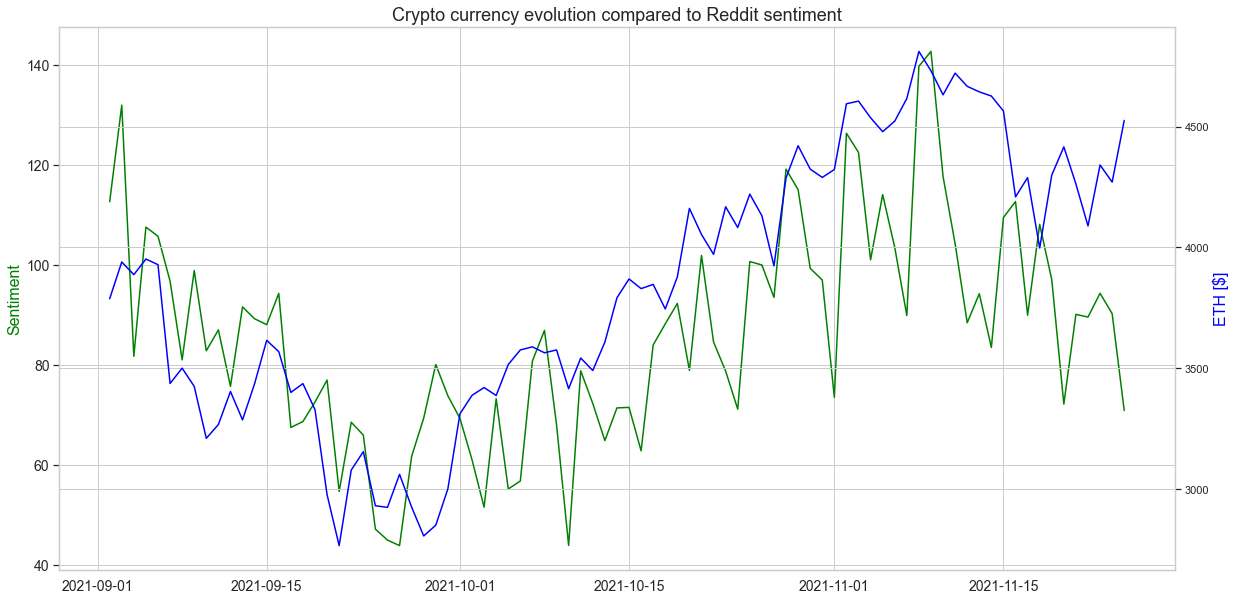

In [26]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to Reddit sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(df_grouped.index, df_grouped, 'g-')
ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel(f"ETH [$]", color='b', fontsize=16)
plt.show()

In [27]:
# Define the cross-correlation function
def crosscorr(datax, datay, lag, method="pearson"):
    return datax.corr(datay.shift(lag), method=method)

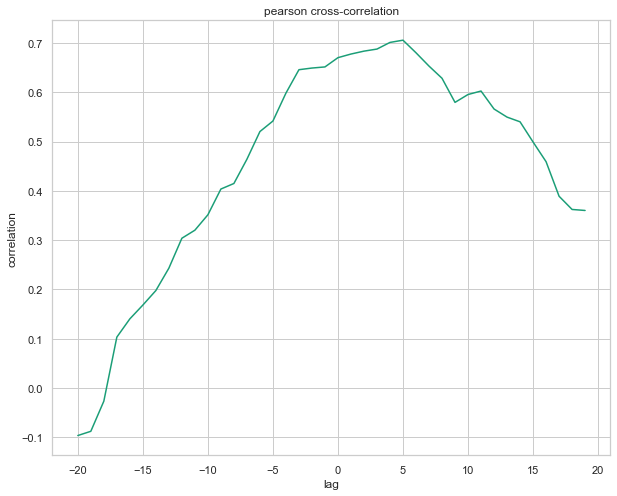

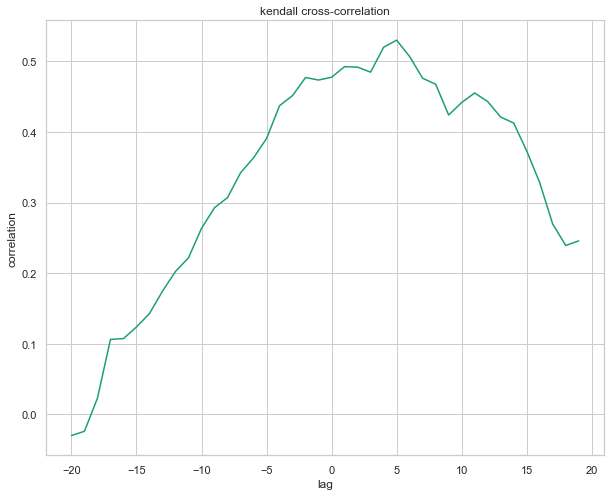

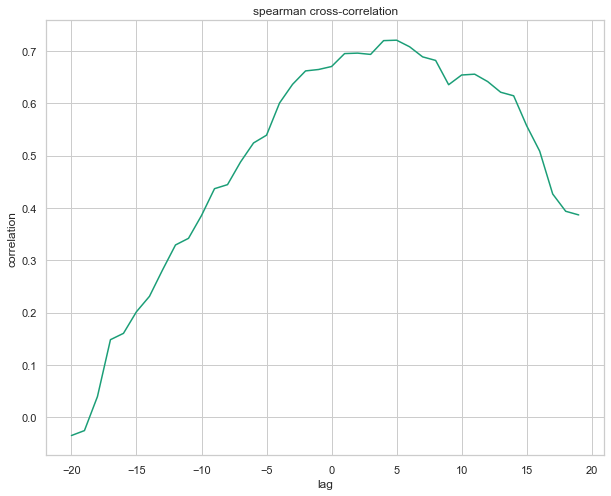

In [28]:
xcov = [crosscorr(df_grouped, crypto_usd_grouped, lag=i, method="pearson") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("pearson cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(df_grouped, crypto_usd_grouped, lag=i, method="kendall") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("kendall cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(df_grouped, crypto_usd_grouped, lag=i, method="spearman") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("spearman cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()